## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [45]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Random state seed
rseed = 42

## Load and explore data

In [47]:
# Import the dataset

df = pd.read_csv('Country-data.csv',index_col=0)

df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [48]:
# Check the shape
df.shape

(167, 9)

In [49]:
# Check datatypes & counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [50]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [51]:
# Identify any missing data
df.isnull().sum()

# There are no missing data in the dataset.

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [52]:
# Drop any non-numeric features (columns). Removing the country name column.
dropped_df=df.reset_index(drop=True)

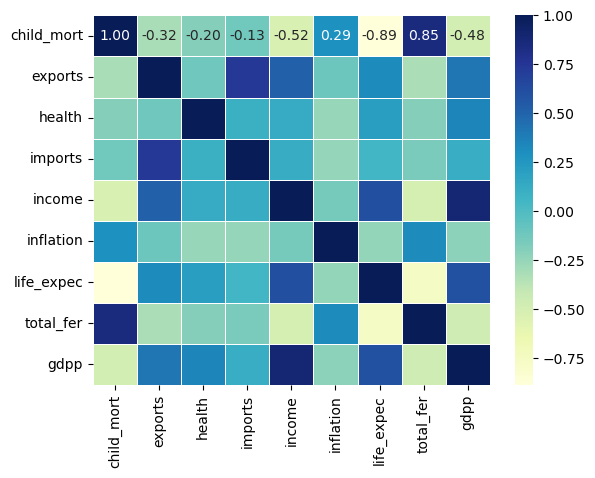

In [53]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

# plotting the heatmap 
sns.heatmap(dropped_df.corr(),cmap="YlGnBu",annot=True,linewidth=0.5,fmt=".2f")
plt.show()


Text(0.5, 1.0, 'gdpp VS child_mort')

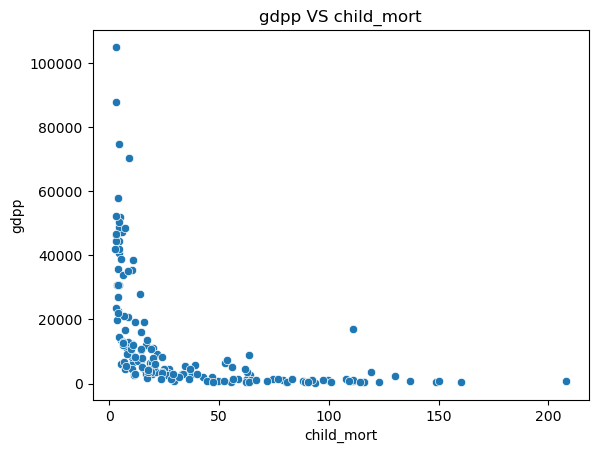

In [54]:
# Explore the continuous independent features against gdpp using scatter plots.

sns.scatterplot(data=dropped_df, x="child_mort", y="gdpp")
plt.title('gdpp VS child_mort')

Text(0.5, 1.0, 'gdpp VS exports')

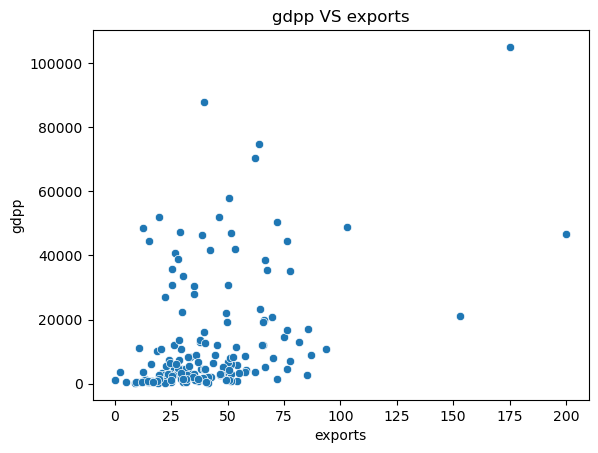

In [55]:
sns.scatterplot(data=dropped_df, x="exports", y="gdpp")
plt.title('gdpp VS exports')

Text(0.5, 1.0, 'gdpp VS health')

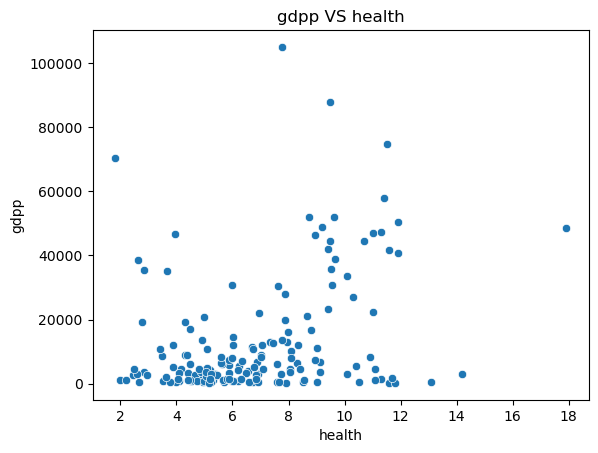

In [56]:
sns.scatterplot(data=dropped_df, x="health", y="gdpp")
plt.title('gdpp VS health')

Text(0.5, 1.0, 'gdpp VS imports')

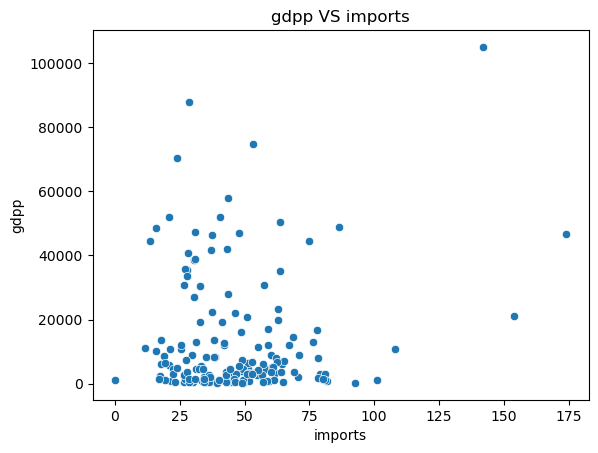

In [57]:
sns.scatterplot(data=dropped_df, x="imports", y="gdpp")
plt.title('gdpp VS imports')

Text(0.5, 1.0, 'gdpp VS income')

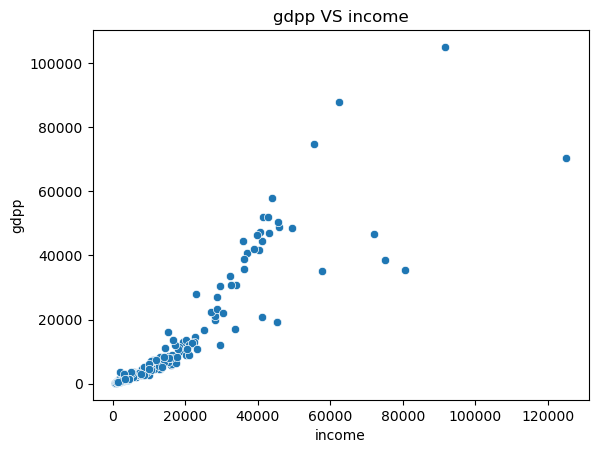

In [58]:
sns.scatterplot(data=dropped_df, x="income", y="gdpp")
plt.title('gdpp VS income')

Text(0.5, 1.0, 'gdpp VS inflation')

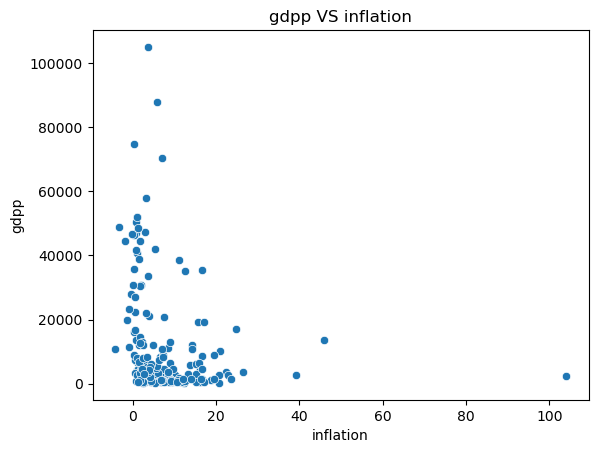

In [59]:
sns.scatterplot(data=dropped_df, x="inflation", y="gdpp")
plt.title('gdpp VS inflation')

Text(0.5, 1.0, 'gdpp VS life_expec')

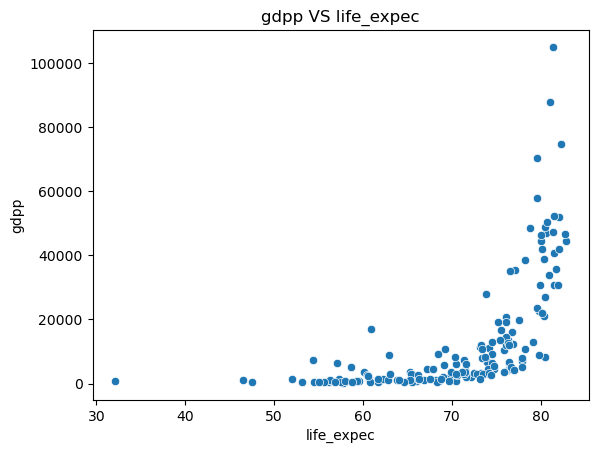

In [60]:
sns.scatterplot(data=dropped_df, x="life_expec", y="gdpp")
plt.title('gdpp VS life_expec')

Text(0.5, 1.0, 'gdpp VS total_fer')

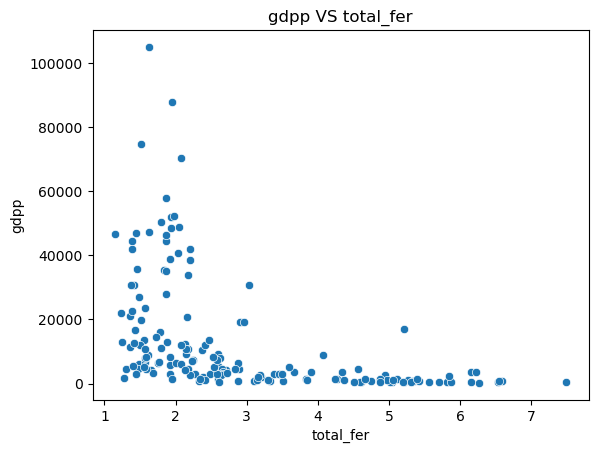

In [61]:
sns.scatterplot(data=dropped_df, x="total_fer", y="gdpp")
plt.title('gdpp VS total_fer')

From the scatter plots and heatmap above, it appears that there's a relationship between gdpp and life expectancy and exports. Gddp and income appear to be closely correlated and are effectively measuring very similar metrics so will not be used in the analysis.

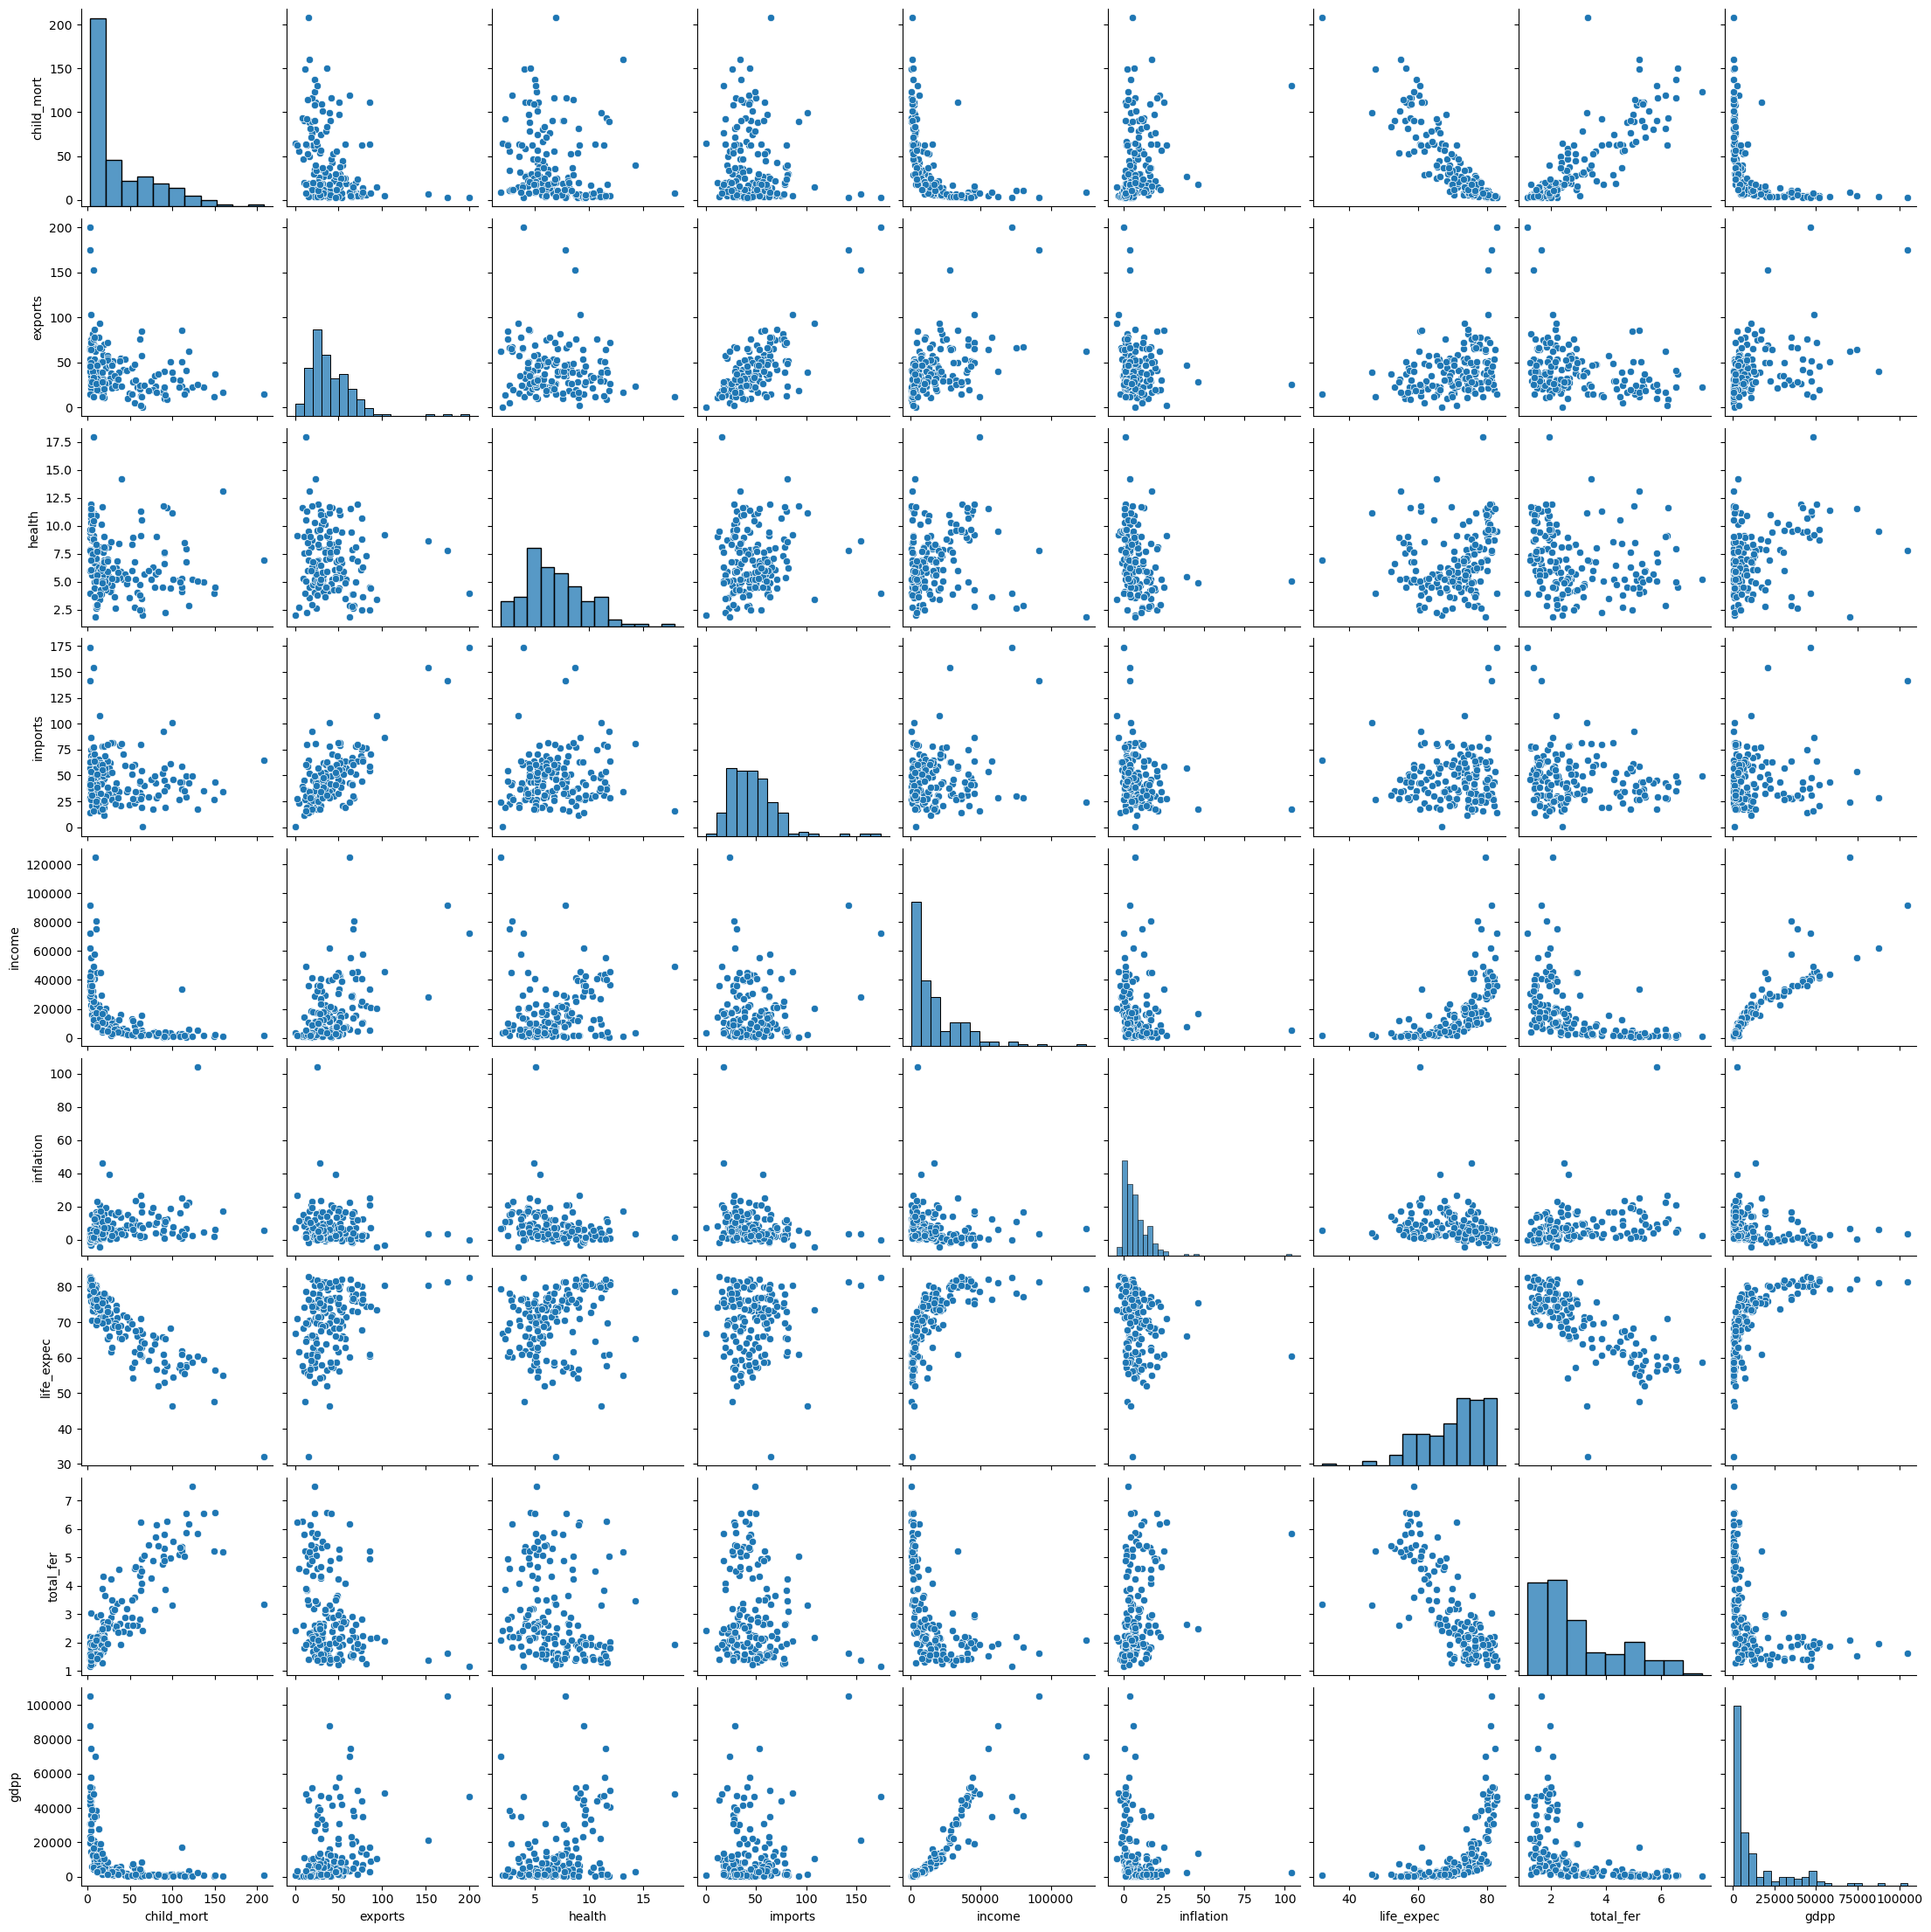

In [62]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(dropped_df)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [63]:
# Prepare data for clustering, I will elect life expectancy as the main data to compare against.
X = df[['life_expec','gdpp']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(167, 2)


In [64]:
X

array([[5.62e+01, 5.53e+02],
       [7.63e+01, 4.09e+03],
       [7.65e+01, 4.46e+03],
       [6.01e+01, 3.53e+03],
       [7.68e+01, 1.22e+04],
       [7.58e+01, 1.03e+04],
       [7.33e+01, 3.22e+03],
       [8.20e+01, 5.19e+04],
       [8.05e+01, 4.69e+04],
       [6.91e+01, 5.84e+03],
       [7.38e+01, 2.80e+04],
       [7.60e+01, 2.07e+04],
       [7.04e+01, 7.58e+02],
       [7.67e+01, 1.60e+04],
       [7.04e+01, 6.03e+03],
       [8.00e+01, 4.44e+04],
       [7.14e+01, 4.34e+03],
       [6.18e+01, 7.58e+02],
       [7.21e+01, 2.18e+03],
       [7.16e+01, 1.98e+03],
       [7.68e+01, 4.61e+03],
       [5.71e+01, 6.35e+03],
       [7.42e+01, 1.12e+04],
       [7.71e+01, 3.53e+04],
       [7.39e+01, 6.84e+03],
       [5.79e+01, 5.75e+02],
       [5.77e+01, 2.31e+02],
       [6.61e+01, 7.86e+02],
       [5.73e+01, 1.31e+03],
       [8.13e+01, 4.74e+04],
       [7.25e+01, 3.31e+03],
       [4.75e+01, 4.46e+02],
       [5.65e+01, 8.97e+02],
       [7.91e+01, 1.29e+04],
       [7.46e+

In [65]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler=MinMaxScaler()
model=scaler.fit(X)
scaled_data=model.transform(X)

# creating a data frame from the scaled numpy arrays
df_scaled=pd.DataFrame(scaled_data)

df_scaled.head()

,0,1
0,0.475345,0.003073
1,0.871795,0.036833
2,0.875740,0.040365
3,0.552268,0.031488
4,0.881657,0.114242


## K-Means Clustering

### Selecting K

c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

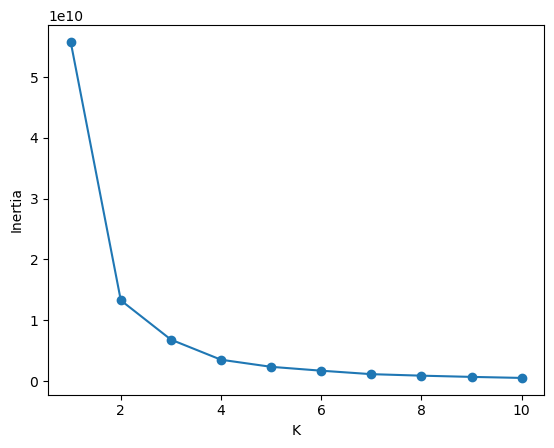

In [66]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(X)

c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

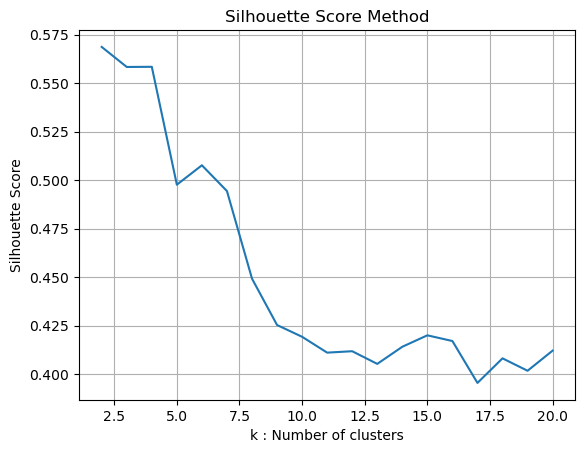

In [67]:
# Silhouette score method
kmax = 20
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow choose a value for K.

It a appears that the value of K at which the elbow occurs, is at K=4

## Fitting a K-Means Model with the selected K value

c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


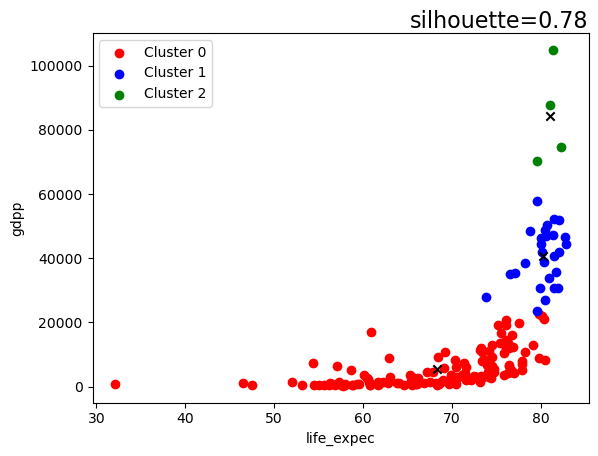

In [68]:
# Check model performance with the silhouette coefficient

def scatter_Kmeans(x, k, r=rseed):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    # plt.scatter(label = 'Cluster testing')

    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('life_expec')
    plt.ylabel('gdpp')
    plt.legend()
    plt.show()


# for k in range(3,6):
#   scatter_Kmeans(X, k,rseed)

# Using the best K value of 3
scatter_Kmeans(X, 3,rseed)

The silhuoette score of the K=3 model is 0.78 and represents the best score.

## Predictions

In [69]:
# Add the predicted cluster label column to the original dataframe

## Visualisation of clusters

c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

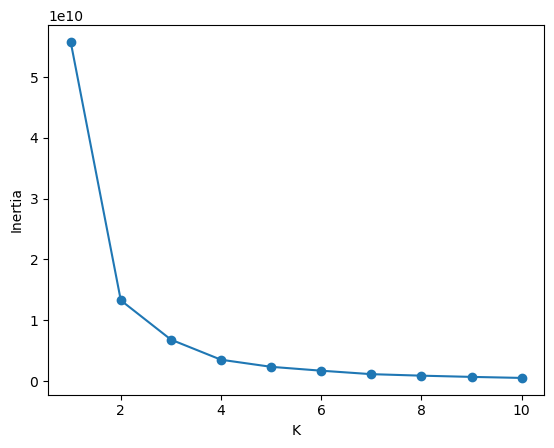

c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


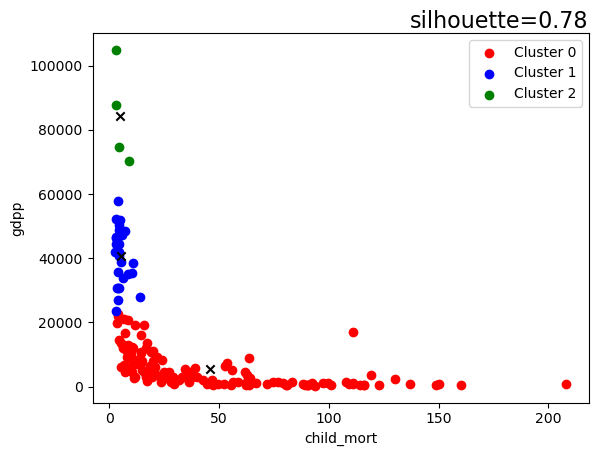

In [70]:
# Visualisation of clusters: child mortality vs gdpp

# Prepare data for clustering.
X_child = df[['child_mort','gdpp']].values.reshape(-1,2)  

# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler=MinMaxScaler()
model=scaler.fit(X_child)
scaled_data=model.transform(X_child)

# creating a data frame from the scaled numpy arrays
df_scaled=pd.DataFrame(scaled_data)

# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(X_child)

# Check model performance with the silhouette coefficient

def scatter_Kmeans(x, k, r=rseed):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('child_mort')
    plt.ylabel('gdpp')
    plt.legend()
    plt.show()


# for k in range(3,6):
#   scatter_Kmeans(X, k,rseed)

# Using the best K value of 3
scatter_Kmeans(X_child, 3,rseed)


c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

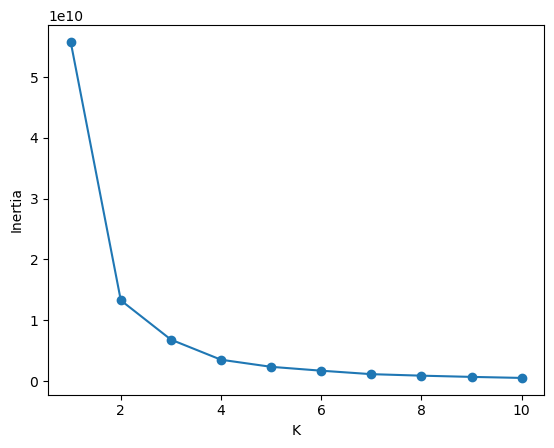

c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


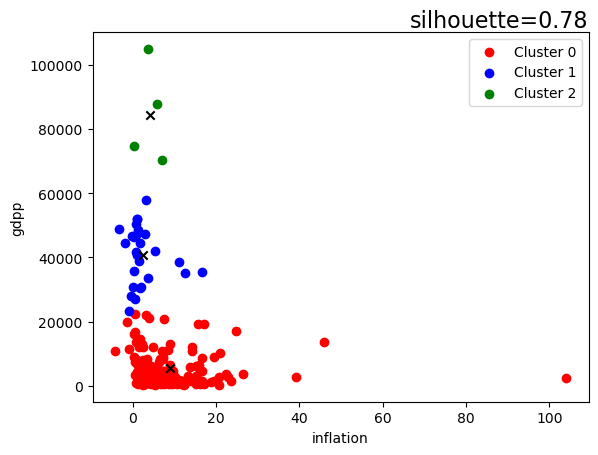

In [71]:
# Visualisation of clusters: inflation vs gdpp

# Prepare data for clustering.
X_inflation = df[['inflation','gdpp']].values.reshape(-1,2)  

# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler=MinMaxScaler()
model=scaler.fit(X_inflation)
scaled_data=model.transform(X_inflation)

# creating a data frame from the scaled numpy arrays
df_scaled=pd.DataFrame(scaled_data)

# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(X_inflation)

# Check model performance with the silhouette coefficient

def scatter_Kmeans(x, k, r=rseed):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('inflation')
    plt.ylabel('gdpp')
    plt.legend()
    plt.show()


# for k in range(3,6):
#   scatter_Kmeans(X, k,rseed)

# Using the best K value of 3
scatter_Kmeans(X_inflation, 3,rseed)

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

Cluster 0 = least developed country

Cluster 1= developing country

Cluster 2= developed country

The developed countries have the highest life expectancy and gdpp, they tend to have high gdpp and low child mortality and finally the lowest inflation rate while having high gdpp.

The least developed counties, on the owther hand, have the lowest life expectancy and low gdpp, they tend to have low gdpp and high child mortality and finally the highest inflation rate while having a low gdpp.

The developing countries, lie somewhere in between the least developed and developed countries.